In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# df_bom = pd.read_csv('data/bom.movie_gross.csv.gz')
# df_imdb_name = pd.read_csv('data/imdb.name.basics.csv.gz')
# df_imdb_akas = pd.read_csv('data/imdb.title.akas.csv.gz')
# df_imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
# df_imdb_crew = pd.read_csv('data/imdb.title.crew.csv.gz')
# df_imdb_principals = pd.read_csv('data/imdb.title.principals.csv.gz')
# df_imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
# df_rt_movies = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t', parse_dates=['theater_date','dvd_date'])
# df_rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t',encoding = 'unicode_escape', parse_dates=['date'])
df_tmdb_movies = pd.read_csv('data/tmdb.movies.csv.gz', parse_dates=['release_date'])
df_budget = pd.read_csv('data/tn.movie_budgets.csv.gz', parse_dates=['release_date'])

In [3]:
tmdb_genre_raw = [{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]

In [4]:
tmdb_genre_dict = {}
for element in tmdb_genre_raw:
    tmdb_genre_dict[element['id']] = element['name']
print(tmdb_genre_dict)

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


### df_bom (bom.movie_gross.csv)
- title and domestic/foreign gross revenues
- 3387 titles from 2010 to 2018

### df_imdb_name (imdb.name.basics.csv)
- database of professionals: ID, name, birth/death years, profession, and max four known titles
- 606638 names

### df_imdb_akas (imdb.title.akas.csv)
- database of international versions: movie ID, titles in different languages, region, and languages
- 331703 versions

### df_imdb_basics (imdb.title.basics.csv)
- basic information by title: movie ID, primary/original titles, year, length, and genres
- 146144 IDs (136071 unique primary titles)

### df_imdb_crew (imdb.title.crew.csv)
- directors/writers by movie
- 146144 movies

### df_imdb_principals
- movies-professionals database: movie ID, professional ID, category (actor/actoress, director etc), and character
- 1028186 roles

### df_imdb_ratings (imdb.title.ratings.csv)
- rating and voter number by movie
- 73856 movies

### df_rt_movies (rt.movie_info.tsv)
- movie ID/title, rating, genre, director, writer, release date, box office revenue, length, and studio
- 1560 movies with some null values

### df_rt_reviews (rt.reviews.tsv.gz)
- critics rating database: movie ID, comments, rating, fresh/rotten, critic name, top critic dummy, publisher, and date
- 54432 reviews of 1135 titles with some null values

### df_tmdb_movies (tmdb.movies.csv)
- genre, movie ID, language, original title, pupularity score, release date, title, vote rating, vote count
- 26517 movies from 1930 to 2020

### df_budget (tn.movie_budgets.csv)
- release date. movie title, production budget, domestic/global sales
- 5782 movies from 1915 to 2020      

In [5]:
df_tmdb_movies.genre_ids = df_tmdb_movies.genre_ids.str.strip('[]').str.split(',')

In [6]:
for element in tmdb_genre_dict:
    df_tmdb_movies[tmdb_genre_dict[element]] = 0
    df_tmdb_movies.loc[df_tmdb_movies.genre_ids.apply(lambda x: str(element) in x), tmdb_genre_dict[element]] = 1

In [7]:
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 29 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null datetime64[ns]
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
Action               26517 non-null int64
Adventure            26517 non-null int64
Animation            26517 non-null int64
Comedy               26517 non-null int64
Crime                26517 non-null int64
Documentary          26517 non-null int64
Drama                26517 non-null int64
Family               26517 non-null int64
Fantasy              26517 non-null int64
History              26517 non-null int64
Horror               26517 non-nul

In [8]:
df_tmdb_movies['year'] = df_tmdb_movies.release_date.dt.year
df_tmdb_movies['month'] = df_tmdb_movies.release_date.dt.month

In [9]:
df_tmdb_movies_2009_2018 = df_tmdb_movies[
    (df_tmdb_movies['release_date'].dt.year >= 2009) & (df_tmdb_movies['release_date'].dt.year<=2018)&(df_tmdb_movies.vote_count>=10)]

In [10]:
df_tmdb_movies_2009_2018.shape

(10239, 31)

In [11]:
df_tmdb_movies_2009_2018 = df_tmdb_movies_2009_2018.drop_duplicates(subset='title')

In [12]:
df_tmdb_movies_2009_2018['log_popularity'] = np.log(df_tmdb_movies_2009_2018.popularity)

In [13]:
df_tmdb_movies_2009_2018.shape

(9425, 32)

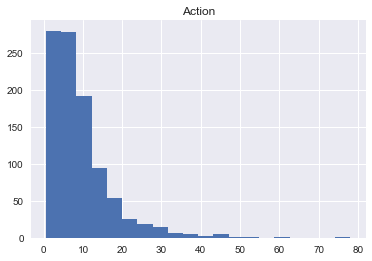

mean
9.320487755102034
std
8.140128330865252


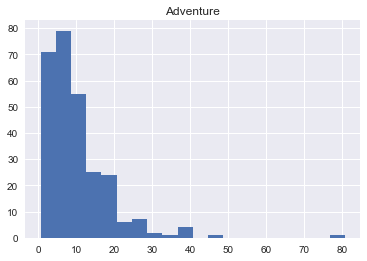

mean
10.14976086956522
std
8.872134698997426


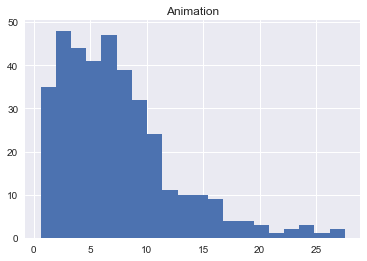

mean
7.37047297297298
std
5.074694709663481


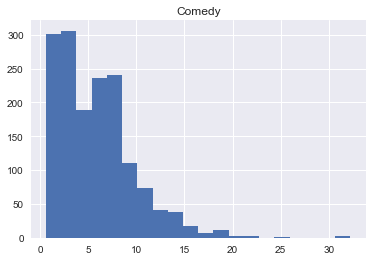

mean
5.8429100696643435
std
3.9095404153601643


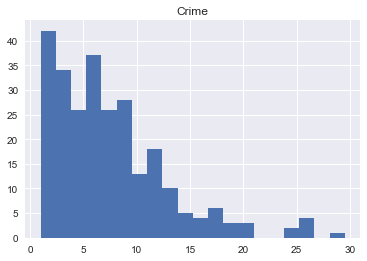

mean
7.530480916030534
std
5.430087246042589


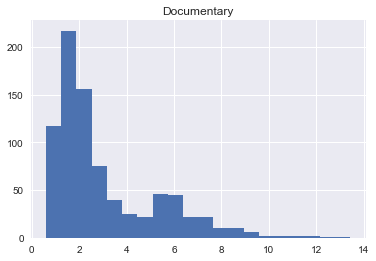

mean
3.0480255164034027
std
2.2303664195661153


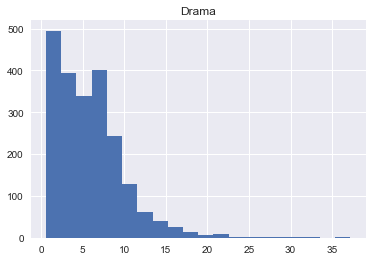

mean
5.965009199632017
std
4.221040270198771


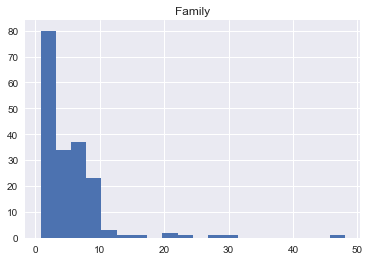

mean
5.364686486486486
std
5.369940265545131


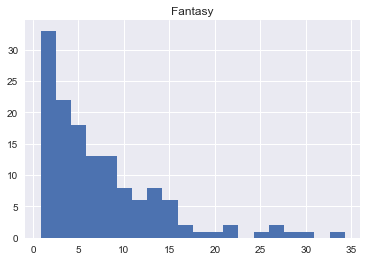

mean
7.541035971223023
std
6.574834800823287


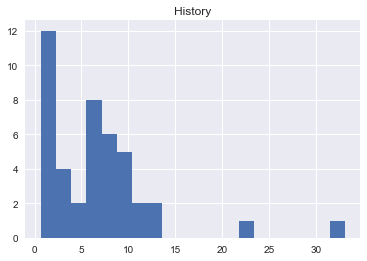

mean
6.63774418604651
std
5.992016117075022


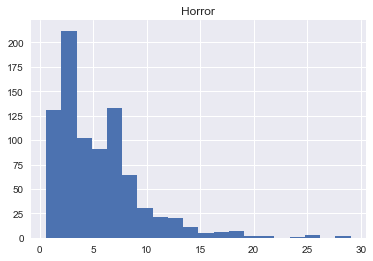

mean
5.513022511848339
std
4.086475311369167


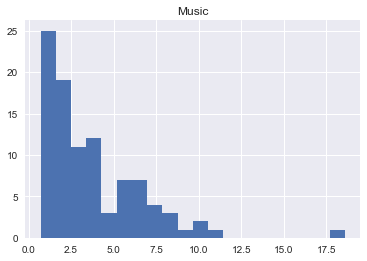

mean
3.713833333333333
std
2.9060322730365242


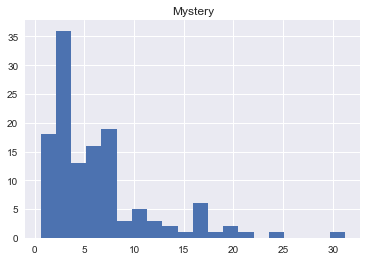

mean
6.346046875000002
std
5.343662112207224


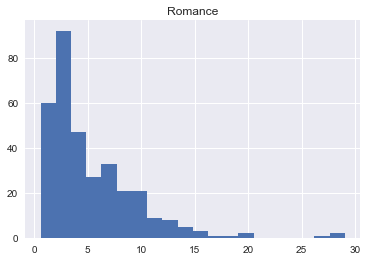

mean
5.2896096096096095
std
4.271568465372551


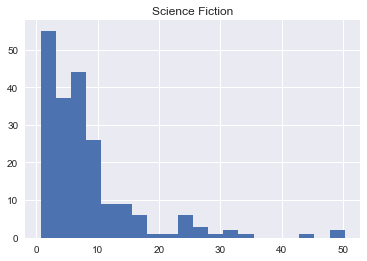

mean
8.300995098039218
std
8.15547857112713


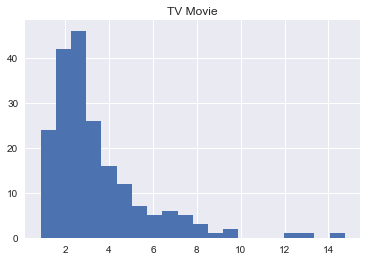

mean
3.3979191919191924
std
2.203305535502738


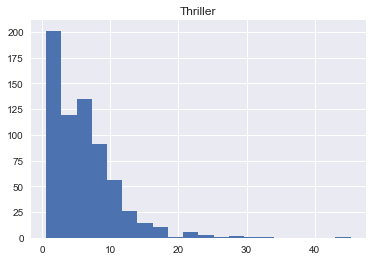

mean
6.201860778443111
std
4.913347893271801


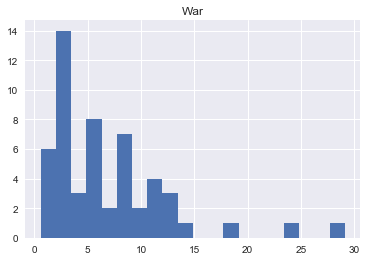

mean
6.816924528301889
std
5.741616533457403


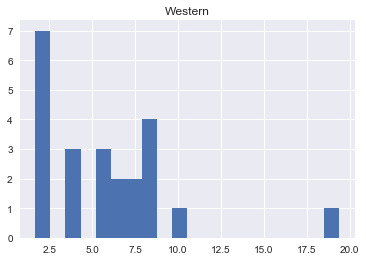

mean
5.82586956521739
std
3.9892197494605597


In [14]:
for genre in list(tmdb_genre_dict.values()):
    df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'popularity'].hist(bins=20)
    plt.title(genre)
    plt.show()
    print('mean')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'popularity'].mean())
    print('std')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'popularity'].std())

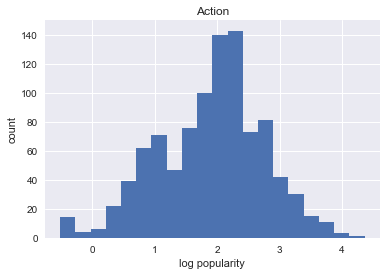

mean
1.904777505778431
std
0.845646824736928


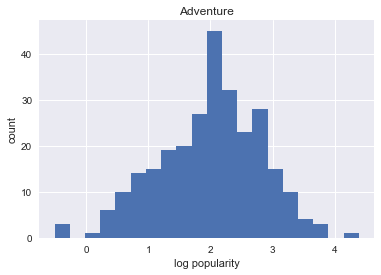

mean
2.0020347962608565
std
0.8273861258662059


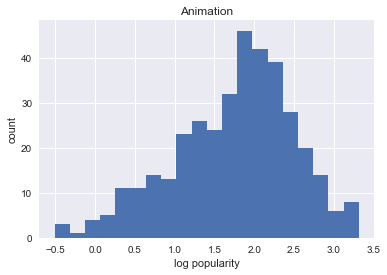

mean
1.7471362032253845
std
0.7556570038774432


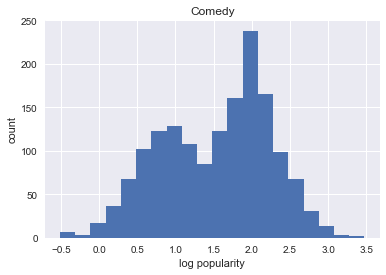

mean
1.5334887266985844
std
0.7117025430649357


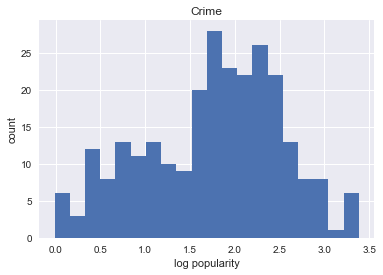

mean
1.7537272951584277
std
0.7675100392401418


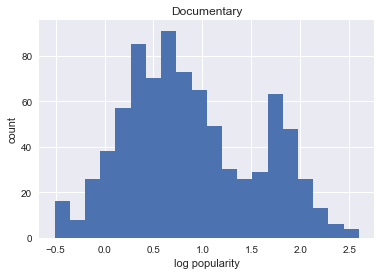

mean
0.8827988892246151
std
0.6703077291341071


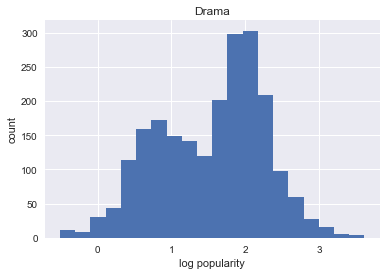

mean
1.5422087820820798
std
0.7283616759871822


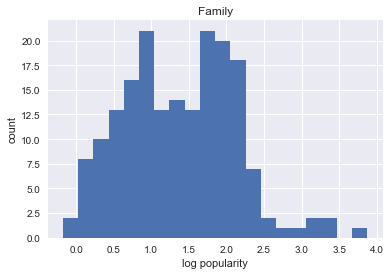

mean
1.3789242064662783
std
0.7499689730504933


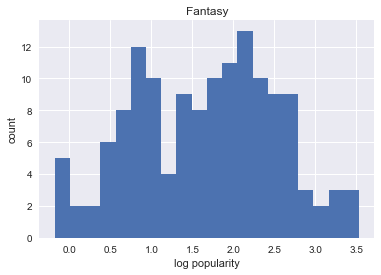

mean
1.6664868479281814
std
0.8701952284031513


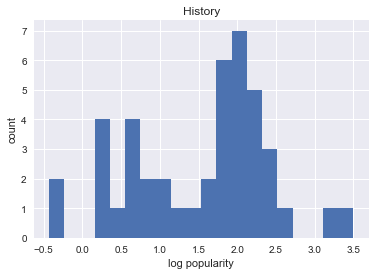

mean
1.5343921426059346
std
0.9058773949850881


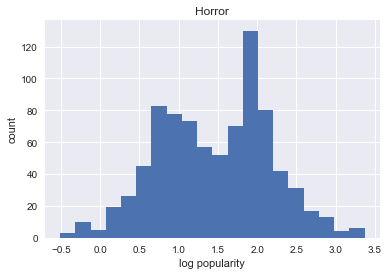

mean
1.4615998732719255
std
0.7142962019685557


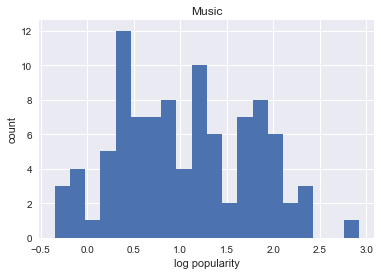

mean
1.0501325113382098
std
0.726806159191002


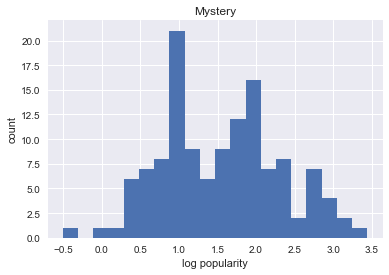

mean
1.5499517748396974
std
0.7742180698464177


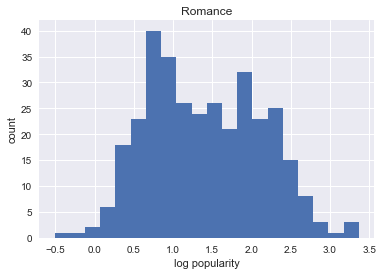

mean
1.3969595143729125
std
0.7287954967723473


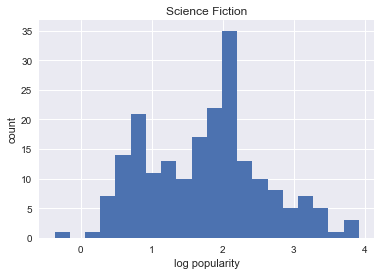

mean
1.759585490616279
std
0.8370274147604053


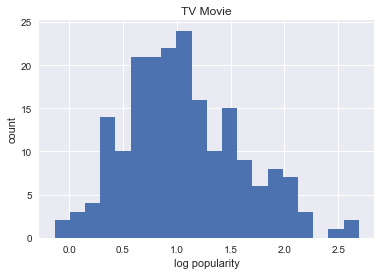

mean
1.0636246588286489
std
0.5446547333275507


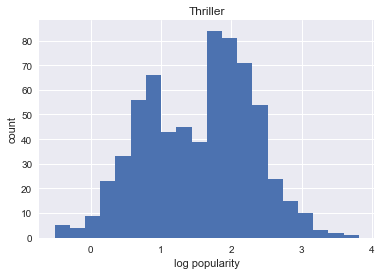

mean
1.5462004058807572
std
0.7680124449208494


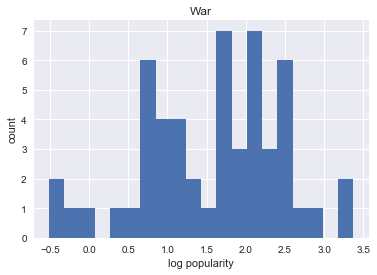

mean
1.573170168300961
std
0.8948775812907828


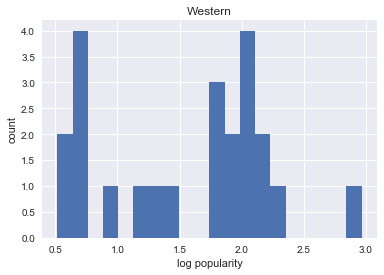

mean
1.5478633697262334
std
0.6865775929502284


In [15]:
boxplot = []
for genre in list(tmdb_genre_dict.values()):
    df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].hist(bins=20)
    plt.title(genre)
    plt.xlabel('log popularity')
    plt.ylabel('count')
    plt.show()
    boxplot.append(df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'])
    print('mean')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].mean())
    print('std')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].std())

In [16]:
df_boxplot = pd.DataFrame(boxplot).T
df_boxplot.columns=list(tmdb_genre_dict.values())

<Figure size 864x216 with 0 Axes>

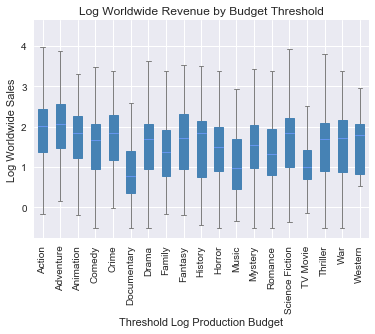

In [52]:
props = dict(boxes="steelblue", whiskers="gray", medians="cornflowerBlue", caps="Gray")

plt.figure(figsize=(12,3))
df_boxplot.plot.box(color=props, patch_artist=True)

plt.title('Log Worldwide Revenue by Budget Threshold')
plt.xlabel('Threshold Log Production Budget')
plt.ylabel('Log Worldwide Sales')
plt.xticks(rotation=90)
#plt.grid(False)
plt.show()

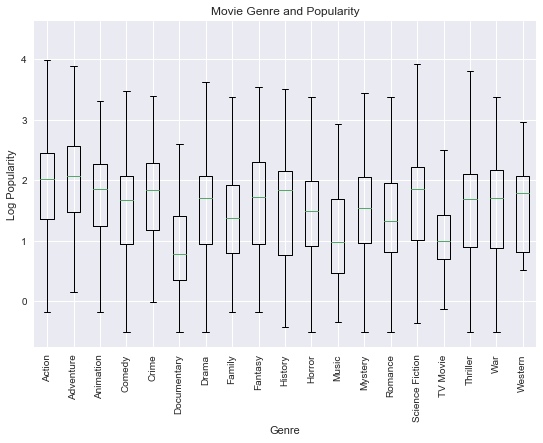

In [18]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(boxplot)
ax.set_xticklabels(list(tmdb_genre_dict.values()),rotation=90)
ax.set_title('Movie Genre and Popularity')
ax.set_ylabel('Log Popularity')
ax.set_xlabel('Genre')
plt.show()

Text(0.5, 1.0, 'Popularity of Movies by Release Month')

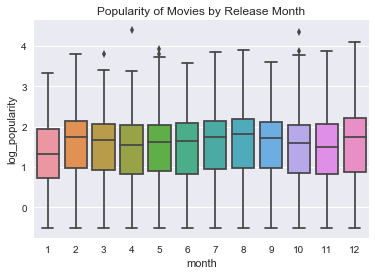

In [19]:
month = df_tmdb_movies_2009_2018.month
lpop = df_tmdb_movies_2009_2018.log_popularity
sns.boxplot(x = month, y = lpop)
plt.title("Popularity of Movies by Release Month")

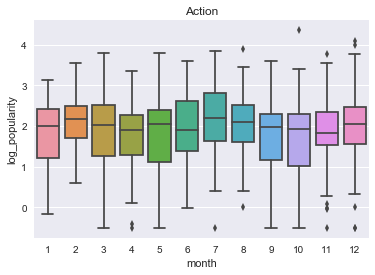

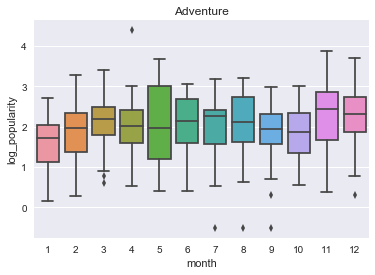

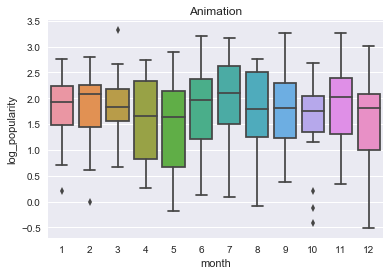

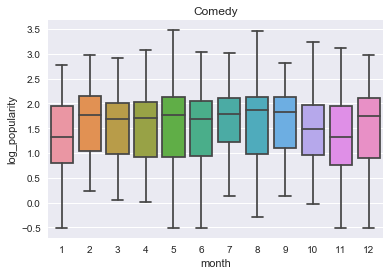

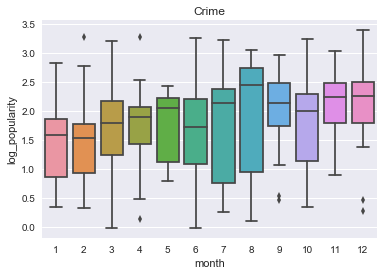

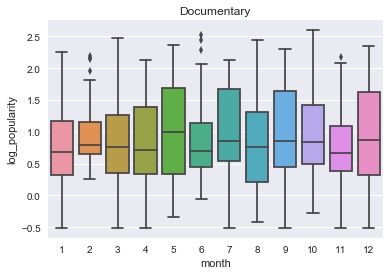

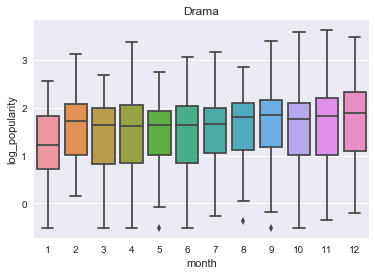

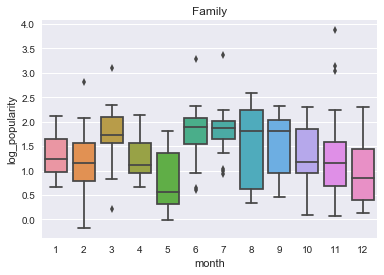

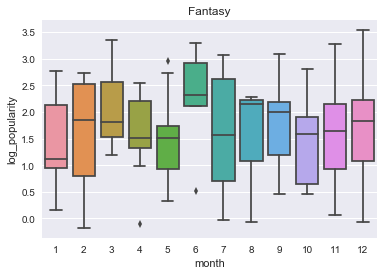

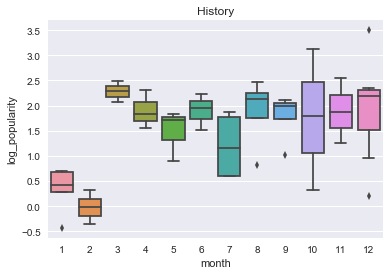

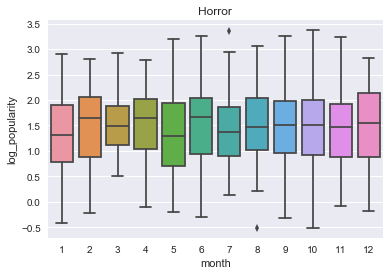

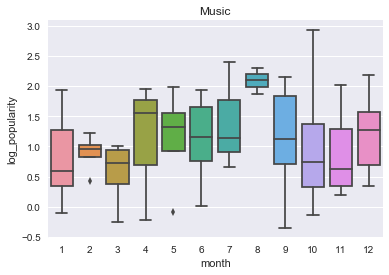

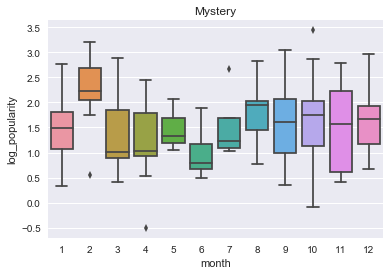

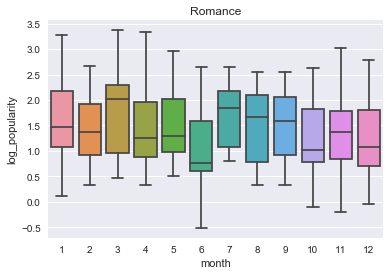

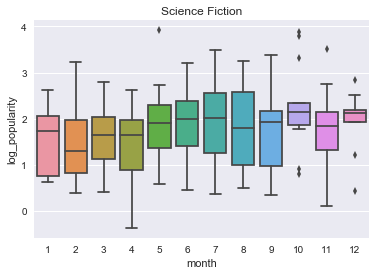

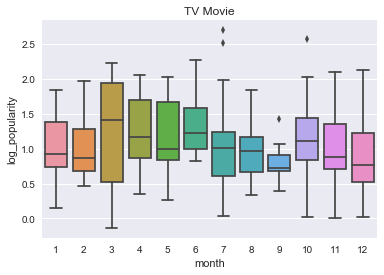

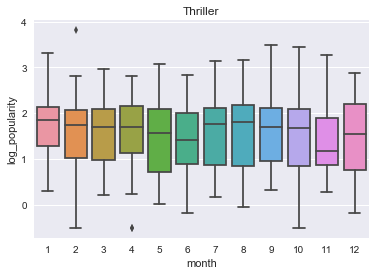

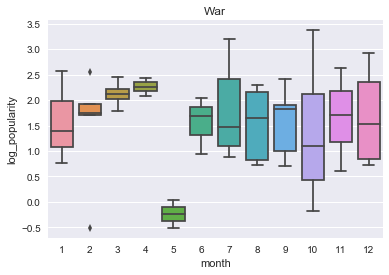

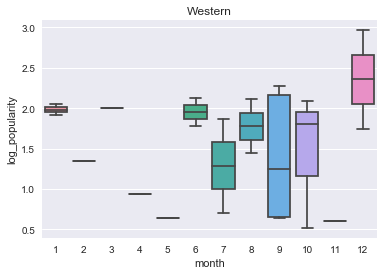

In [20]:
for genre in list(tmdb_genre_dict.values()):
    month = df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'month']
    lpop = df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity']
    sns.boxplot(x = month, y = lpop)
    plt.title(genre)
    plt.show()


In [21]:
df_tmdb_movies_2009_2018.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,year,month,log_popularity
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,2010,11,3.512530
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,2010,3,3.358081
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,0,0,2010,5,3.350430
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,0,0,2010,7,3.329343
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,...,0,0,0,0,0,0,0,2010,2,3.284326


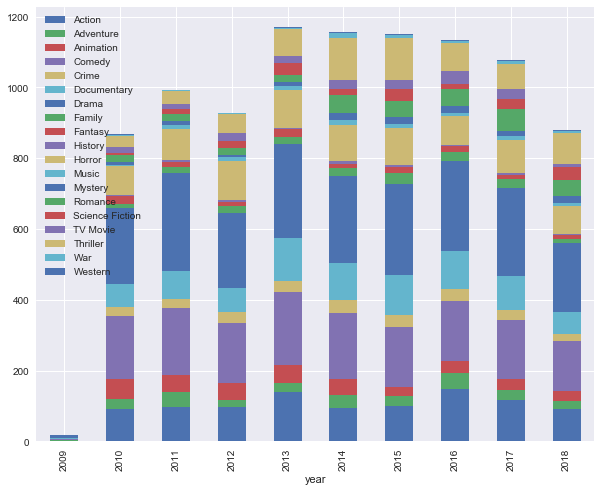

In [22]:
df_tmdb_movies_2009_2018.groupby('year')[list(tmdb_genre_dict.values())].sum().plot(kind='bar', stacked=True, figsize = (10,8))

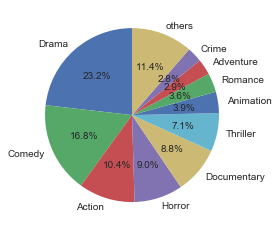

In [24]:
genre_share = df_tmdb_movies_2009_2018[list(tmdb_genre_dict.values())].sum()*100/df_tmdb_movies_2009_2018[list(tmdb_genre_dict.values())].sum().sum()
genre_share = genre_share.sort_values(ascending=False)
genre_share_plot = genre_share[0:10]
genre_share_plot['others'] = 100-genre_share_plot.sum()

fig1, ax1 = plt.subplots()
ax1.pie(genre_share_plot, labels=list(genre_share_plot.index), autopct='%1.1f%%', startangle=90)
ax1.set_xticklabels(labels=list(genre_share_plot.index),fontdict={'fontsize': 20})

plt.show()



In [26]:
df_budget.production_budget = df_budget.production_budget.str.replace(',', '')
df_budget.production_budget = df_budget.production_budget.str.replace('$', '')
df_budget.production_budget = df_budget.production_budget.astype(int)

df_budget.domestic_gross = df_budget.domestic_gross.str.replace(',', '')
df_budget.domestic_gross = df_budget.domestic_gross.str.replace('$', '')
df_budget.domestic_gross = df_budget.domestic_gross.astype(int)

df_budget.worldwide_gross = df_budget.worldwide_gross.str.replace(',', '')
df_budget.worldwide_gross = df_budget.worldwide_gross.str.replace('$', '')
df_budget.worldwide_gross = df_budget.worldwide_gross.astype(int)

In [34]:
df_budget.rename(columns={'movie':'title'}, inplace=True)

In [35]:
df_merged = pd.merge(df_tmdb_movies_2009_2018,df_budget,on="title")

In [36]:
df_merged.shape

(1718, 37)

In [37]:
df_merged = df_merged[df_merged.worldwide_gross != 0]

In [38]:
df_merged['log_worldwide'] = np.log(df_merged.worldwide_gross)
df_merged['log_budget'] = np.log(df_merged.production_budget)

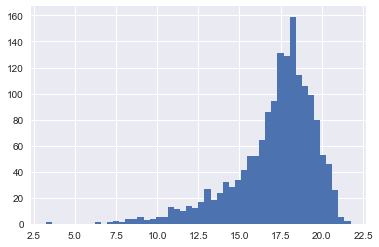

In [39]:
df_merged['log_worldwide'].hist(bins=50)

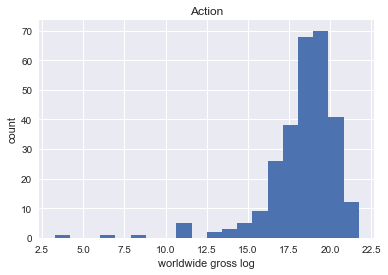

mean
18.345854700988404
std
2.2574696335510875


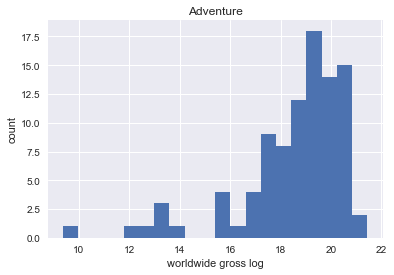

mean
18.482062308162405
std
2.1531938661098033


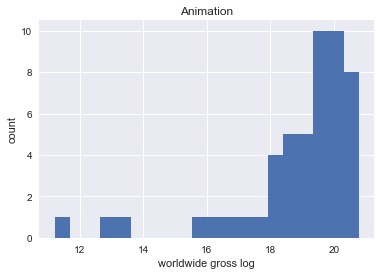

mean
18.874152423781755
std
2.0054093973023837


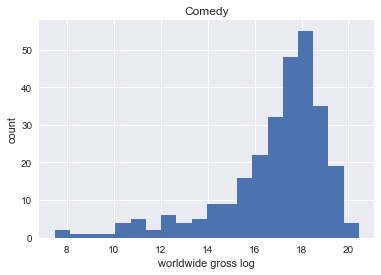

mean
16.846583119274708
std
2.3277654084567865


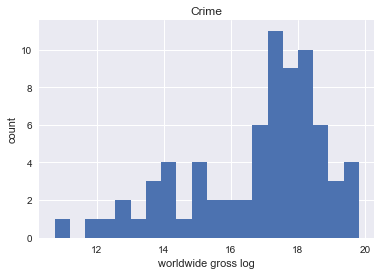

mean
16.778046124917555
std
2.071406847195165


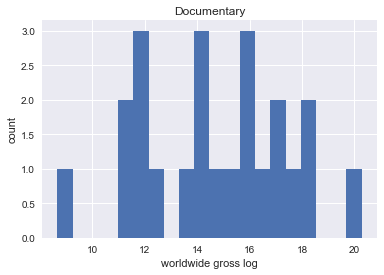

mean
14.73576477553398
std
2.809784549437619


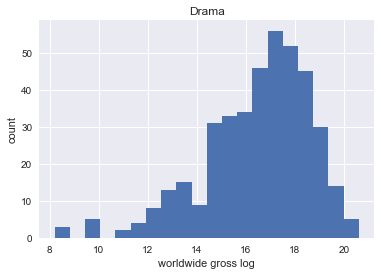

mean
16.478705608619848
std
2.1884719528505565


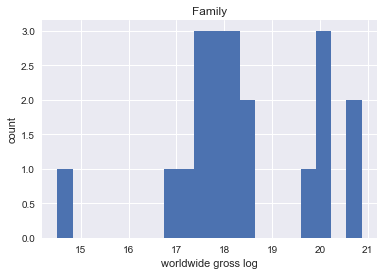

mean
18.418356154508214
std
1.5013491840822681


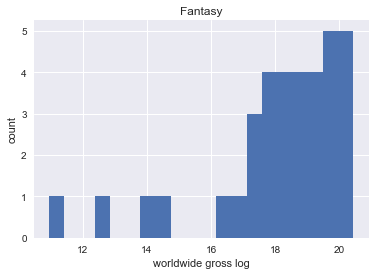

mean
18.104350562727756
std
2.1473457558785647


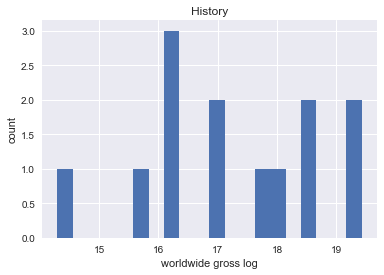

mean
17.236556585077928
std
1.51001544792794


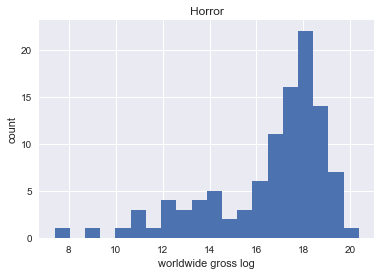

mean
16.578480758558033
std
2.559353245311294


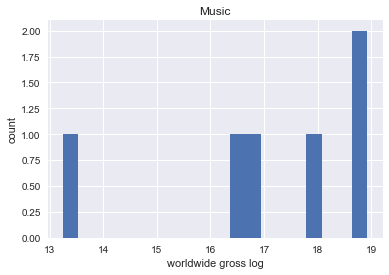

mean
17.0883237333997
std
2.1202382369515513


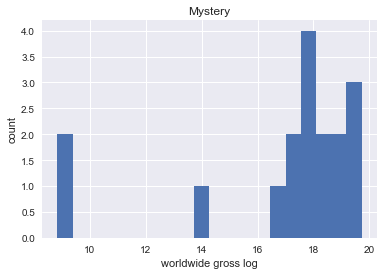

mean
16.920754342360034
std
3.2723376433855087


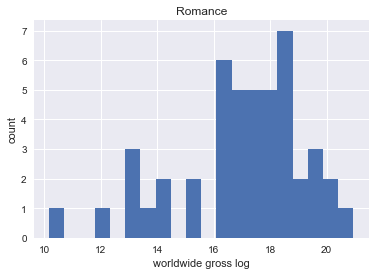

mean
16.996429401487784
std
2.2971255620665247


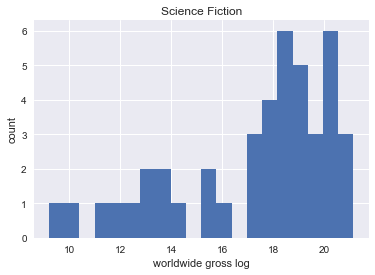

mean
17.248844072008318
std
3.1795958869596146


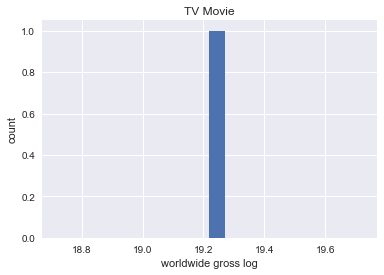

mean
19.219911925891214
std
nan


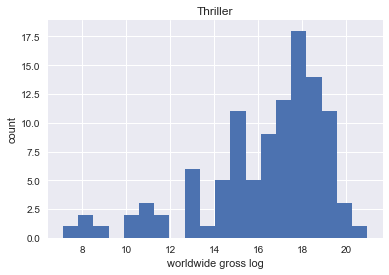

mean
16.299633714394847
std
2.828251628484381


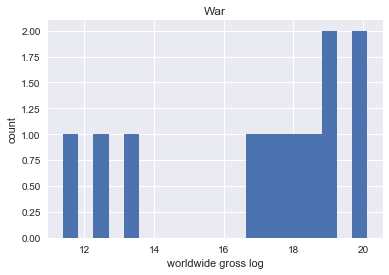

mean
17.004408650645015
std
2.9307655737057328


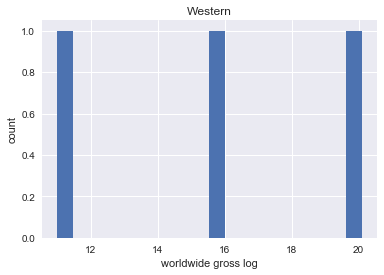

mean
15.670907246457928
std
4.553634118192527


In [40]:
for genre in list(tmdb_genre_dict.values()):
    df_merged.loc[df_merged[genre]==1, 'log_worldwide'].hist(bins=20)
    plt.title(genre)
    plt.xlabel('worldwide gross log')
    plt.ylabel('count')
    plt.show()
    print('mean')
    print (df_merged.loc[df_merged[genre]==1, 'log_worldwide'].mean())
    print('std')
    print (df_merged.loc[df_merged[genre]==1, 'log_worldwide'].std())

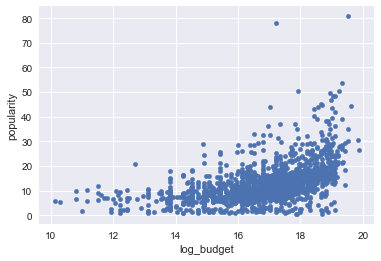

In [41]:
df_merged.plot.scatter("log_budget","popularity")

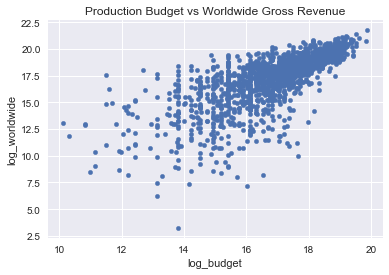

In [42]:
df_merged.plot.scatter("log_budget","log_worldwide")
plt.title("Production Budget vs Worldwide Gross Revenue")



plt.show()

In [43]:
revenue_by_budget = df_merged.loc[df_merged.log_budget > 10, 'log_worldwide']


for i in list(range(11,20)):
    revenue_by_budget = pd.concat([revenue_by_budget, df_merged.loc[df_merged.log_budget > i, 'log_worldwide']],axis=1)
revenue_by_budget.columns=list(range(10,20))
revenue_by_budget.describe()

,10,11,12,13,14,15,16,17,18,19
count,1615.000000,1611.000000,1599.000000,1579.000000,1519.000000,1403.000000,1208.000000,789.000000,325.000000,62.000000
mean,17.154236,17.165260,17.203506,17.256283,17.407283,17.640292,17.977251,18.581618,19.571541,20.315174
std,2.488877,2.481979,2.437820,2.393291,2.234077,2.055007,1.796154,1.498179,0.902363,0.635592
min,3.258097,3.258097,3.258097,3.258097,7.124478,7.124478,7.124478,10.010277,14.235320,19.008733
25%,16.119407,16.126048,16.161111,16.240586,16.442383,16.777085,17.228993,17.926908,19.064917,19.832194
50%,17.700799,17.711334,17.734200,17.761426,17.848787,17.994238,18.212785,18.739510,19.625966,20.429864
75%,18.830557,18.833890,18.842137,18.865741,18.901459,18.972210,19.172080,19.542035,20.236460,20.785208
max,21.744401,21.744401,21.744401,21.744401,21.744401,21.744401,21.744401,21.744401,21.744401,21.744401


<Figure size 576x288 with 0 Axes>

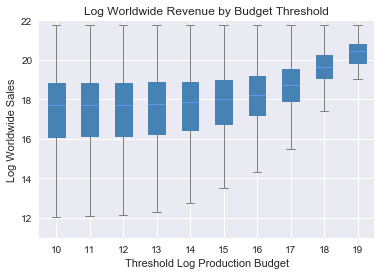

In [51]:
props = dict(boxes="steelblue", whiskers="gray", medians="cornflowerBlue", caps="Gray")
plt.figure(figsize=(8,4))
revenue_by_budget.plot.box(color=props, patch_artist=True)

plt.title('Log Worldwide Revenue by Budget Threshold')
plt.xlabel('Threshold Log Production Budget')
plt.ylabel('Log Worldwide Sales')
#plt.grid(False)
plt.ylim(11,22)
plt.show()


In [ ]:
revenue_by_budget_genre = pd.concat([revenue_by_budget,df_merged[list(tmdb_genre_dict.values())]],axis=1)

In [ ]:
props = dict(boxes="steelblue", whiskers="gray", medians="cornflowerBlue", caps="Gray")
for genre in list(tmdb_genre_dict.values()):
    revenue_by_budget_genre.loc[revenue_by_budget_genre[genre]==1, list(range(10,20))].plot.box(color=props, patch_artist=True)

    plt.title(genre)
    plt.xlabel('Threshold Log Production Budget')
    plt.ylabel('Log Worldwide Sales')
    plt.ylim(11,22)
    plt.show()

In [ ]:
for genre in list(tmdb_genre_dict.values()):
    df_merged.loc[df_merged[genre]==1].plot.scatter("log_budget","log_worldwide")
    plt.title(genre)
    plt.xlabel('Production Budget (Log)')
    plt.ylabel('Worldwide Revenue (Log)')
    plt.show()
    

In [ ]:
df_budget.head()

In [ ]:
df_budget['global_profit_ratio'] = df_budget['worldwide_gross']/df_budget['production_budget']
df_budget['domestic_profit_ratio'] = df_budget['domestic_gross']/df_budget['production_budget']

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figwidth(15)
ax1.scatter(df_budget.release_date, df_budget.production_budget/1000000)
ax1.set_xlabel('release year')
ax1.set_ylabel('production budget')
ax2.scatter(df_budget.release_date, df_budget.worldwide_gross/1000000)
ax2.set_xlabel('release year')
ax2.set_ylabel('worldwide gross')
ax3.scatter(df_budget.production_budget/1000000, df_budget.worldwide_gross/1000000)
ax3.set_xlabel('production budget')
ax3.set_ylabel('worldwide gross')

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(10)
ax1.scatter(df_budget.release_date, df_budget.global_profit_ratio)
ax1.set_xlabel('release year')
ax1.set_ylabel('worldwide profit ratio')
ax1.set_ylim(0,250)

ax2.scatter(df_budget.release_date, df_budget.domestic_profit_ratio)
ax2.set_xlabel('release year')
ax2.set_ylabel('domestic profit ratio')
ax2.set_ylim(0,250)